In [1]:
# load necessary packages
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'/Users/Joy/Desktop/Syracuse/1_IST652 Scripting for DS'

### Packages from advanced topics
We use 
- <b>seaborn</b> for descriptive analysis and; 
- <b>scikit-learn</b> for topic modeling 

from the advanced topics

In [3]:
#os.listdir()

### Read in dataset
- There are 3 datasets and each has different dimensions and publishers
    - Each row is an article

In [4]:
# load dataset_1

a1 = pd.read_csv("articles1.csv") 
print(a1.shape)
a1.head(3)

(50000, 10)


Unnamed: 0     id                                              title  \
0           0  17283  House Republicans Fret About Winning Their Hea...   
1           1  17284  Rift Between Officers and Residents as Killing...   
2           2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...   

      publication                         author        date    year  month  \
0  New York Times                     Carl Hulse  2016-12-31  2016.0   12.0   
1  New York Times  Benjamin Mueller and Al Baker  2017-06-19  2017.0    6.0   
2  New York Times                   Margalit Fox  2017-01-06  2017.0    1.0   

   url                                            content  
0  NaN  WASHINGTON  —   Congressional Republicans have...  
1  NaN  After the bullet shells get counted, the blood...  
2  NaN  When Walt Disney’s “Bambi” opened in 1942, cri...

In [5]:
# load dataset2

a2 = pd.read_csv("articles2.csv") 
print(a2.shape)
a2.head(3)

(49999, 10)


Unnamed: 0     id                                              title  \
0       53293  73471  Patriots Day Is Best When It Digs Past the Her...   
1       53294  73472  A Break in the Search for the Origin of Comple...   
2       53295  73474         Obama’s Ingenious Mention of Atticus Finch   

  publication             author        date    year  month  url  \
0    Atlantic         David Sims  2017-01-11  2017.0    1.0  NaN   
1    Atlantic            Ed Yong  2017-01-11  2017.0    1.0  NaN   
2    Atlantic  Spencer Kornhaber  2017-01-11  2017.0    1.0  NaN   

                                             content  
0  Patriots Day, Peter Berg’s new thriller that r...  
1  In Norse mythology, humans and our world were ...  
2  “If our democracy is to work in this increasin...

In [6]:
# load dataset3

a3 = pd.read_csv("articles3.csv") 
print(a3.shape)
a3.head(3)

(42571, 10)


Unnamed: 0      id                                              title  \
0      103459  151908  Alton Sterling’s son: ’Everyone needs to prote...   
1      103460  151909  Shakespeare’s first four folios sell at auctio...   
2      103461  151910  My grandmother’s death saved me from a life of...   

  publication          author        date    year  month  \
0    Guardian  Jessica Glenza  2016-07-13  2016.0    7.0   
1    Guardian             NaN  2016-05-25  2016.0    5.0   
2    Guardian   Robert Pendry  2016-10-31  2016.0   10.0   

                                                 url  \
0  https://www.theguardian.com/us-news/2016/jul/1...   
1  https://www.theguardian.com/culture/2016/may/2...   
2  https://www.theguardian.com/commentisfree/2016...   

                                             content  
0  The son of a Louisiana man whose father was sh...  
1  Copies of William Shakespeare’s first four boo...  
2  Debt: $20, 000, Source: College, credit cards,...

In [7]:
# quick summary of each dataset
a3.groupby('publication').count()

Unnamed: 0     id  title  author   date   year  month    url  \
publication                                                                     
Guardian               3808   3808   3808    3211   3793   3793   3793   3808   
NPR                   11992  11992  11992   11654  11992  11992  11992  11992   
Reuters               10710  10710  10709   10710  10710  10710  10710  10710   
Vox                    4947   4947   4947    4947   4947   4947   4947   4947   
Washington Post       11114  11114  11114   11077  11114  11114  11114  11114   

                 content  
publication               
Guardian            3808  
NPR                11992  
Reuters            10710  
Vox                 4947  
Washington Post    11114

In [8]:
# quick summary of each dataset
a2.groupby('publication').count()

Unnamed: 0     id  title  author   date   year  month  \
publication                                                                  
Atlantic                   7008   7008   7008    6028   7008   7008   7008   
Buzzfeed News              4854   4854   4854    4853   4854   4854   4854   
Fox News                   4354   4354   4354    1117   4352   4352   4352   
Guardian                   4873   4873   4873    4039   4848   4848   4848   
National Review            6203   6203   6203    6203   6203   6203   6203   
New York Post             17493  17493  17493   17485  17493  17493  17493   
Talking Points Memo        5214   5214   5213    1676   2615   2615   2615   

                       url  content  
publication                          
Atlantic                 0     7008  
Buzzfeed News         4854     4854  
Fox News              4351     4354  
Guardian              4873     4873  
National Review       6203     6203  
New York Post        17493    17493  
Talking Points Memo   5214     5214

In [9]:
# quick summary of each dataset
a1.groupby('publication').count()

Unnamed: 0     id  title  author   date   year  month  url  \
publication                                                                    
Atlantic                 171    171    171     171    171    171    171    0   
Breitbart              23781  23781  23781   23781  23781  23781  23781    0   
Business Insider        6757   6757   6757    4950   6757   6757   6757    0   
CNN                    11488  11488  11488    7025  11488  11488  11488    0   
New York Times          7803   7803   7803    7767   7803   7803   7803    0   

                  content  
publication                
Atlantic              171  
Breitbart           23781  
Business Insider     6757  
CNN                 11488  
New York Times       7803

## Data Pre-processing
- Combine all 3 datasets
- check summary of the dataset
- drop un-necessary columns and NAs
- convert to proper data types: string to datetime

In [141]:
# combine all dataframes
a_all = pd.concat([a1,a2,a3]).reset_index()

In [146]:
# sample article - at least 
print(len(a_all.content.iloc[0]))
a_all.content.iloc[0]

5607


'WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law, angering conservative voters who have been 

In [11]:
# check info
a_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142570 entries, 0 to 42570
Data columns (total 10 columns):
Unnamed: 0     142570 non-null int64
id             142570 non-null int64
title          142568 non-null object
publication    142570 non-null object
author         126694 non-null object
date           139929 non-null object
year           139929 non-null float64
month          139929 non-null float64
url            85559 non-null object
content        142570 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 12.0+ MB


In [12]:
# drop columns that are not needed
a_all = a_all.drop(columns=['url','Unnamed: 0'])

In [13]:
# drop NAs
a_all2 = a_all.dropna(axis=0)

In [14]:
# drop duplicates but there are none
a_all3 = a_all.drop_duplicates()
a_all3.shape

(142570, 8)

In [129]:
# check again
a_all2.info()

# data points changed from 142,570 to 125,010

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125010 entries, 0 to 42570
Data columns (total 8 columns):
id             125010 non-null int64
title          125010 non-null object
publication    125010 non-null object
author         125010 non-null object
date           125010 non-null datetime64[ns]
year           125010 non-null float64
month          125010 non-null float64
content        125010 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 8.6+ MB


In [16]:
# convert to proper data types
a_all2.loc[:,'date'] = pd.to_datetime(a_all2.loc[:,'date'])#, format='%Y%m%d', errors='ignore')
a_all2.dtypes

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


id                      int64
title                  object
publication            object
author                 object
date           datetime64[ns]
year                  float64
month                 float64
content                object
dtype: object

### Descriptive Analysis
- Number of articles by publishers
- Monthly number of articles
- Annual number of articles by publishers

In [17]:
# create aggregate dataframe first
pub_stat = a_all2.groupby(['publication']).count()[['content']].reset_index()
pub_stat.head(2)

publication  content
0    Atlantic     6199
1   Breitbart    23781

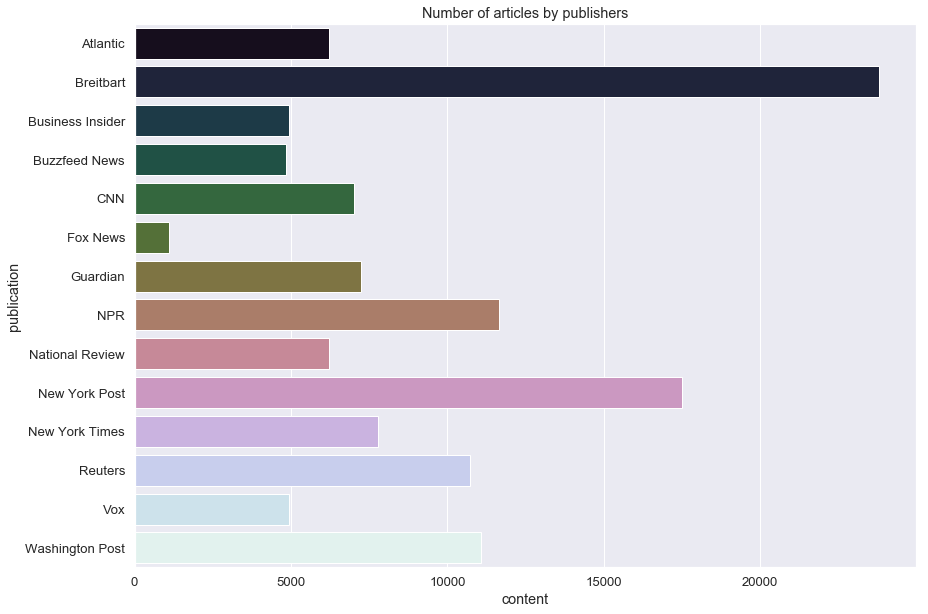

In [18]:
# create plots based on the df
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
plt.figure( figsize=(14,10) )
palette = sns.color_palette("cubehelix", 14)
ax = sns.barplot(y="publication", x="content",palette=palette,data=pub_stat)
plt.title("Number of articles by publishers")
plt.show()


In [19]:
#Monthly number of articles
monthly = a_all2.groupby(['month','publication']).count()[['content']].reset_index()
monthly.head(2)

month publication  content
0    1.0    Atlantic      463
1    1.0   Breitbart     2760

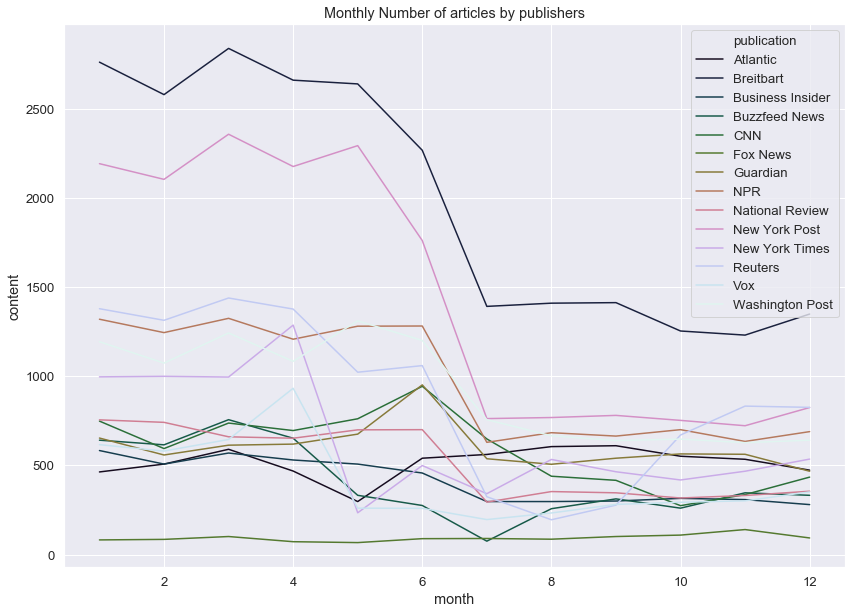

In [20]:
sns.set(style="whitegrid")

sns.set(font_scale=1.2)
plt.figure( figsize=(14,10) )
palette = sns.color_palette("cubehelix", 14)
ax = sns.lineplot(x="month", y="content",hue="publication",palette=palette,markers=True,data=monthly)
plt.title("Monthly Number of articles by publishers")
plt.show()


In [21]:
#Annual number of articles by publishers
yearly = a_all2.groupby(['year','publication']).count()[['content']].reset_index()
yearly.head(2)

year publication  content
0  2000.0         NPR        1
1  2003.0         NPR        1

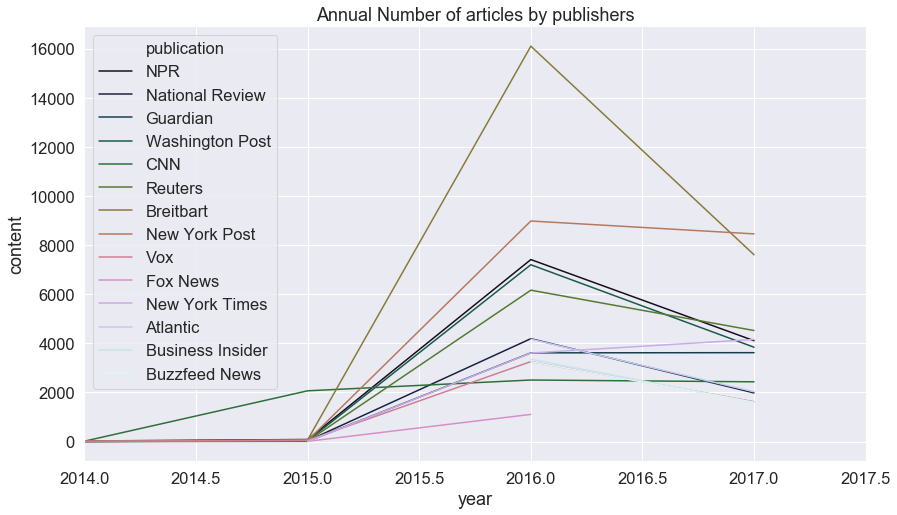

In [22]:
sns.set(style="darkgrid")

# Plot the responses for different events and regions
sns.set(font_scale=1.5)
plt.figure( figsize=(14,8) )
palette = sns.color_palette("cubehelix", 14)
ax = sns.lineplot(x="year", y="content",hue="publication",palette=palette,markers=True,data=yearly)
plt.xlim(2014,2017.5)
plt.title("Annual Number of articles by publishers")
plt.show()


In [23]:
aut_stat = a_all2.groupby(['publication'])[['content','author']].nunique()
aut_stat['Avg_article'] = aut_stat['content'] /aut_stat['author']
aut_stat = aut_stat.reset_index()
aut_stat

publication  content  author  Avg_article
0           Atlantic     6171     708     8.716102
1          Breitbart    23738     387    61.338501
2   Business Insider     4929     184    26.788043
3      Buzzfeed News     4543     345    13.168116
4                CNN     7024     527    13.328273
5           Fox News     1113     213     5.225352
6           Guardian     7245    1377     5.261438
7                NPR    11654    1178     9.893039
8    National Review     6188     760     8.142105
9      New York Post    17464    1895     9.215831
10    New York Times     7767    2430     3.196296
11           Reuters    10709    4024     2.661282
12               Vox     4942     356    13.882022
13   Washington Post    11063    1563     7.078055

In [147]:
aut_stat.describe()

content       author  Avg_article
count     14.000000    14.000000    14.000000
mean    8896.428571  1139.071429    13.421033
std     5833.877358  1077.099343    15.062635
min     1113.000000   184.000000     2.661282
25%     5249.250000   363.750000     5.715592
50%     7134.500000   734.000000     8.965966
75%    10974.500000  1516.500000    13.288234
max    23738.000000  4024.000000    61.338501

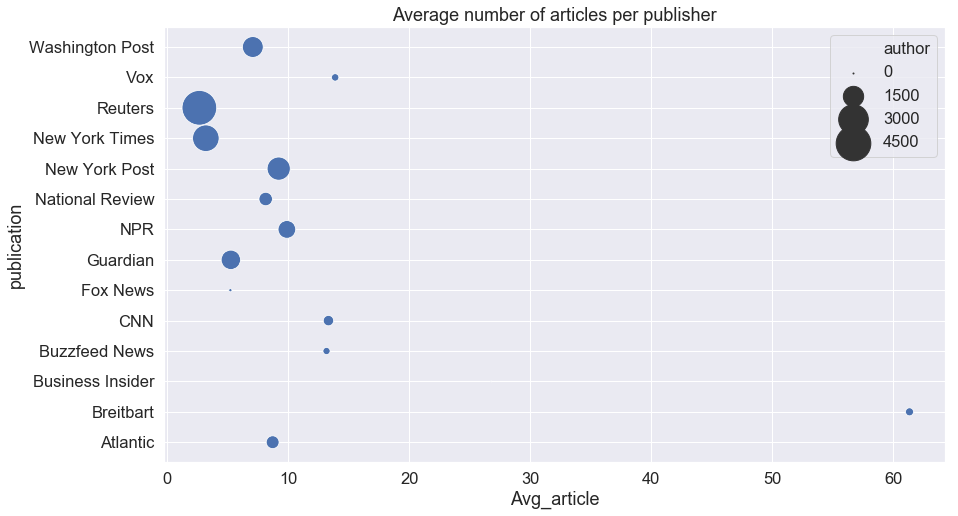

In [24]:
sns.set(style="darkgrid")

# Plot the responses for different events and regions
sns.set(font_scale=1.5)
plt.figure( figsize=(14,8) )
palette = sns.color_palette("cubehelix", 14)
ax = sns.scatterplot(y="publication", x="Avg_article",size="author",sizes=(1, 1200),data=aut_stat)
plt.title("Average number of articles per publisher")
plt.show()


### Subsetting dataframe for data analysis

In [176]:
clean_a = a_all2.groupby(['publication','author']).nunique()[['content']].sort_values('content',ascending=False)
print(clean_a.shape)
clean_a.head(2)

(15947, 1)


content
publication author                 
Breitbart   Breitbart News     1519
            Pam Key            1282

In [180]:
# we wanted to make sure all authors have at least 150 articles for analysis
clean_a2 = clean_a[clean_a['content'] >=150]
print(clean_a2.shape)
print('There are', clean_a2['content'].count(), 'authors, and',clean_a2['content'].sum(),'articles')

# reset index to create the author list and only use those articles
clean_a2.reset_index(inplace=True)
clean_a2.head(2)

(118, 1)
There are 118 authors, and 36363 articles


publication          author  content
0   Breitbart  Breitbart News     1519
1   Breitbart         Pam Key     1282

In [178]:
# reset index to create the author list and only use those articles
author_list = clean_a2['author'].tolist()

In [181]:
# create new df with only certain authors
a_new = a_all2[a_all2['author'].isin(author_list)]
a_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36618 entries, 79 to 42562
Data columns (total 8 columns):
id             36618 non-null int64
title          36618 non-null object
publication    36618 non-null object
author         36618 non-null object
date           36618 non-null datetime64[ns]
year           36618 non-null float64
month          36618 non-null float64
content        36618 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.5+ MB


In [182]:
a_new['date'] = pd.to_datetime(a_new['date'])#, format='%Y%m%d', errors='ignore')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [183]:
a_new.head(2)

id                                              title  \
79    17376  2 Credit-Reporting Agencies Must Pay $23 Milli...   
3646  21332  Harley-Davidson to Pay $12 Million Fine in Pol...   

         publication   author       date    year  month  \
79    New York Times  Reuters 2017-01-03  2017.0    1.0   
3646  New York Times  Reuters 2016-08-22  2016.0    8.0   

                                                content  
79    The nation’s consumer watchdog agency on Tuesd...  
3646  WASHINGTON  —     has agreed to pay a $12 mill...

In [184]:
a_new.dtypes

id                      int64
title                  object
publication            object
author                 object
date           datetime64[ns]
year                  float64
month                 float64
content                object
dtype: object

In [33]:
#a_new.to_csv(index=False)
#export_csv = a_new.to_csv (r'/Users/Joy/Desktop/Syracuse/1_IST652 Scripting for DS/a_new.csv', index = None, header=True) 
#Don't forget to add '.csv' at the end of the path


In [189]:
a_new.groupby(['publication']).nunique()[['content','author']].sort_values('content')

content  author
publication                      
New York Times          4       1
Buzzfeed News         354       2
Washington Post       492       3
CNN                   562       3
Business Insider     1081       5
Atlantic             1492       8
National Review      1783       8
Vox                  2548      13
NPR                  2822       8
New York Post        6428      25
Breitbart           18986      49

In [35]:
# let's focus on NPR only
npr = a_new[a_new.publication == 'NPR']
npr.shape

(2822, 8)

In [36]:
npr.head(2)

id                                              title publication  \
3809  160642  Trump Tweets Give A Glimpse Into Foreign Polic...         NPR   
3811  160644  Putin Says Russia Won’t Expel Diplomats In Res...         NPR   

                author       date    year  month  \
3809    Jessica Taylor 2016-12-28  2016.0   12.0   
3811  Camila Domonoske 2016-12-30  2016.0   12.0   

                                                content  
3809    Donald Trump has used Twitter  —   his prefe...  
3811  Updated at 2:50 p. m. ET, Russian President Vl...

In [194]:
npr_aut = npr.groupby('author').count()[['content']].reset_index()
npr_aut.head(2)

author  content
0     Bill Chappell      412
1  Camila Domonoske      593

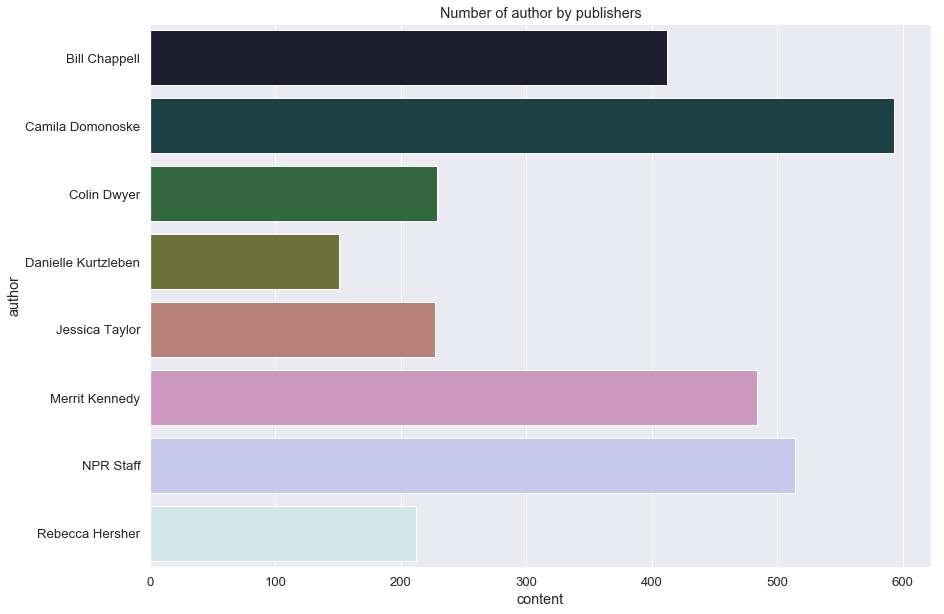

In [195]:
import seaborn as sns
sns.set(style="whitegrid")
#f, ax = plt.subplots(figsize=(6, 15))
sns.set(font_scale=1.2)
plt.figure( figsize=(14,10) )
palette = sns.color_palette("cubehelix", 8)
ax = sns.barplot(x="content", y="author",palette=palette,data=npr_aut)
#plt.xlim(2014,2017.5)
plt.title("Number of author by publishers")
plt.show()


In [196]:
npr_aut2 = npr.groupby(['author','month']).count()[['content']].reset_index()
npr_aut2.head(2)

author  month  content
0  Bill Chappell    1.0       37
1  Bill Chappell    2.0       54

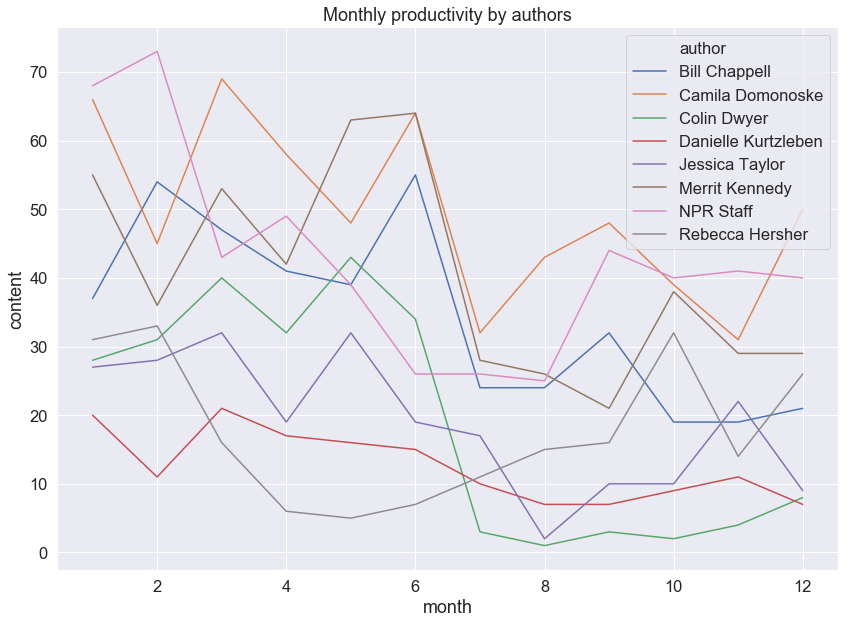

In [199]:
sns.set(style="darkgrid")
sns.set(font_scale=1.5)
plt.figure( figsize=(14,10) )
ax = sns.lineplot(x="month", y="content",hue="author",data=npr_aut2)
#plt.xlim(2014,2017.5)
plt.title("Monthly productivity by authors")
plt.show()


### Possible data analytics

- How many article does each publisher release each month/year?
- how many publishers are there? How many authors per publisher?
- What topics do those publishers cover (based on the articles)?
    - Extract nouns and check frequency
    - aggregate by author and publishers - what topics does NPR create?

In [39]:
#npr.drop(columns=['level_0','index'], inplace=True)
npr_new = npr[['id','title','publication','author','content']]

In [40]:
npr_new.head(2)

id                                              title publication  \
3809  160642  Trump Tweets Give A Glimpse Into Foreign Polic...         NPR   
3811  160644  Putin Says Russia Won’t Expel Diplomats In Res...         NPR   

                author                                            content  
3809    Jessica Taylor    Donald Trump has used Twitter  —   his prefe...  
3811  Camila Domonoske  Updated at 2:50 p. m. ET, Russian President Vl...

In [41]:
len(npr_new)

2822

### Natural Language Processing

In [42]:
# load necessary packages
import nltk
from nltk.corpus import stopwords
import re
nltk_stopwords = set(stopwords.words('english'))

In [43]:
# update stopwords with time that might not be as helpful to understand the content
nltk_stopwords.update(["p.m.", "a.m.","p.","m.","a.","m.","et"])

In [44]:
npr_new.groupby('author').count()[['content']]

content
author                      
Bill Chappell            412
Camila Domonoske         593
Colin Dwyer              229
Danielle Kurtzleben      151
Jessica Taylor           227
Merrit Kennedy           484
NPR Staff                514
Rebecca Hersher          212

### Analyze author by author in NPR
- Hypothesis: each author has different focused topics
    - Can we differentiate focused topics by authors?

In [45]:
npr_bc = npr_new[npr_new.author == "Bill Chappell"]
npr_bc_li = npr_bc.content.tolist()
npr_bc.head(2)

id                                              title publication  \
4353  161314  Cease-Fire Talks Between Syria And Opposition ...         NPR   
4372  161337  ’I’m Intersex,’ A Supermodel Says, Hoping To E...         NPR   

             author                                            content  
4353  Bill Chappell  The main players in Syria’s   civil war are me...  
4372  Bill Chappell  Saying she doesn’t want other kids to suffer t...

In [46]:
# define a function that returns only words
def alpha_filter(w):
    pattern = re.compile('^[^a-z]+$')
    if (pattern.match(w)):
        return True
    else:
        return False

In [47]:
# lowercase words as they are tokenized
bc_lower = [tok.lower() for i in npr_bc_li for tok in nltk.word_tokenize(i)]
print(len(bc_lower))
print(bc_lower[:5])

# remove stopwords
bc_lower_stop = [x for x in bc_lower if not x in nltk_stopwords]
print(len(bc_lower_stop))
print(bc_lower_stop[:5])

# remove punctuations
bc_lower_stop_pun = [y for y in bc_lower_stop if not alpha_filter(y)]
print(len(bc_lower_stop_pun))
print(bc_lower_stop_pun[:5])

271453
['the', 'main', 'players', 'in', 'syria']
168193
['main', 'players', 'syria', '’', 'civil']
126647
['main', 'players', 'syria', 'civil', 'war']


In [48]:
bc_pos = nltk.pos_tag(bc_lower_stop_pun)
bc_pos[:10]

[('main', 'JJ'),
 ('players', 'NNS'),
 ('syria', 'VBP'),
 ('civil', 'JJ'),
 ('war', 'NN'),
 ('meeting', 'NN'),
 ('astana', 'JJ'),
 ('kazakhstan', 'NN'),
 ('monday', 'NN'),
 ('talks', 'NNS')]

##### We only care about Nouns

In [49]:
# generate Noun list and adjective, but be careful about the adject list cuz it's not bi-gram
NN_list = []
AJ_list = []
for i,j in bc_pos:
    #print(i)
    if j == 'NN' or j == 'NNS' or j == 'NNP' or j == 'NNPS':
        NN_list.append(i)
    elif j == 'JJ' or j == 'JJS' or j == 'JJR':
        AJ_list.append(i)

In [50]:
print('There are',len(NN_list),'nouns in the list of articles from author -Bill Chappell')
print('There are',len(AJ_list),'adjectives in the list of articles from author -Bill Chappell')

There are 61736 nouns in the list of articles from author -Bill Chappell
There are 23807 adjectives in the list of articles from author -Bill Chappell


In [51]:
# word frequency for the first author - some of the words are not important for us
bc_freq = nltk.FreqDist(bc_lower_stop_pun)
bc_freq_top = bc_freq.most_common()
bc_freq_top[:10]

[('said', 1163),
 ('says', 795),
 ('u.', 762),
 ('s.', 705),
 ('also', 672),
 ('one', 575),
 ('people', 469),
 ('new', 428),
 ('two', 394),
 ('trump', 390)]

In [52]:
NN_list[:10]

['players',
 'war',
 'meeting',
 'kazakhstan',
 'monday',
 'talks',
 'discussion',
 'bolster',
 'agreement',
 'violence']

In [53]:
# word frequency for the all listings
bc_freq = nltk.FreqDist(NN_list)
bc_freq_top = bc_freq.most_common()
bc_freq_top[:20]

[('people', 469),
 ('s.', 417),
 ('police', 346),
 ('president', 343),
 ('news', 334),
 ('time', 324),
 ('reports', 299),
 ('trump', 283),
 ('years', 282),
 ('state', 281),
 ('court', 238),
 ('case', 217),
 ('year', 215),
 ('law', 197),
 ('day', 187),
 ('team', 184),
 ('company', 183),
 ('world', 182),
 ('department', 181),
 ('part', 181)]

In [54]:
# let's look at tri-gram
from nltk.collocations import *
trigram_measures = nltk.collocations.TrigramAssocMeasures()

bot_lower = [tok.lower() for i in npr_bc_li for tok in nltk.word_tokenize(i)]

# convert original list into a list of bi-grams tokens
bot_trigrams = list(nltk.trigrams(bot_lower))
print(len(bot_trigrams))
finder = TrigramCollocationFinder.from_words(bot_lower)

# remove punctuations and other special characters
finder.apply_word_filter(alpha_filter)

# remove stopwords
finder.apply_word_filter(lambda w: w in nltk_stopwords)
bot_trigrams = finder.score_ngrams(trigram_measures.raw_freq)
print(len(bot_trigrams))
bot_trigrams[:100]

271451
15171


[(('california', 'national', 'guard'), 6.630982158974114e-05),
 (('original', 'post', 'continues'), 5.894206363532545e-05),
 (('u.', 's.', 'military'), 5.894206363532545e-05),
 (('u.', 's.', 'officials'), 5.894206363532545e-05),
 (('s.', 'supreme', 'court'), 5.525818465811761e-05),
 (('u.', 's.', 'attorney'), 5.525818465811761e-05),
 (('u.', 's.', 'supreme'), 5.525818465811761e-05),
 (('president', 'vladimir', 'putin'), 5.157430568090977e-05),
 (('international', 'olympic', 'committee'), 4.420654772649409e-05),
 (('u.', 's.', 'soccer'), 4.420654772649409e-05),
 (('director', 'james', 'comey'), 4.052266874928625e-05),
 (('fbi', 'director', 'james'), 4.052266874928625e-05),
 (('new', 'york', 'times'), 4.052266874928625e-05),
 (('rio', 'de', 'janeiro'), 4.052266874928625e-05),
 (('u.', 's.', 'team'), 4.052266874928625e-05),
 (('comes', 'one', 'day'), 3.6838789772078406e-05),
 (('russian', 'president', 'vladimir'), 3.6838789772078406e-05),
 (('u.', 's.', 'coalition'), 3.6838789772078406e-0

In [55]:
# see if we could see different content with 5-grams
from nltk.util import ngrams

bc_outp1 = list(ngrams(bc_lower_stop_pun, 5))
bc_outp1[:50]

[('main', 'players', 'syria', 'civil', 'war'),
 ('players', 'syria', 'civil', 'war', 'meeting'),
 ('syria', 'civil', 'war', 'meeting', 'astana'),
 ('civil', 'war', 'meeting', 'astana', 'kazakhstan'),
 ('war', 'meeting', 'astana', 'kazakhstan', 'monday'),
 ('meeting', 'astana', 'kazakhstan', 'monday', 'talks'),
 ('astana', 'kazakhstan', 'monday', 'talks', 'arranged'),
 ('kazakhstan', 'monday', 'talks', 'arranged', 'russia'),
 ('monday', 'talks', 'arranged', 'russia', 'discussion'),
 ('talks', 'arranged', 'russia', 'discussion', 'seeks'),
 ('arranged', 'russia', 'discussion', 'seeks', 'bolster'),
 ('russia', 'discussion', 'seeks', 'bolster', 'agreement'),
 ('discussion', 'seeks', 'bolster', 'agreement', 'ended'),
 ('seeks', 'bolster', 'agreement', 'ended', 'violence'),
 ('bolster', 'agreement', 'ended', 'violence', 'syria'),
 ('agreement', 'ended', 'violence', 'syria', 'officials'),
 ('ended', 'violence', 'syria', 'officials', 'say'),
 ('violence', 'syria', 'officials', 'say', 'expect'),

### Next author - Camila Domonoske

In [56]:
# next author
npr_cd = npr_new[npr_new.author == "Camila Domonoske"]
npr_cd_li = npr_cd['content'].tolist()

In [57]:
# lowercase words as they are tokenized
cd_lower = [tok.lower() for i in npr_cd_li for tok in nltk.word_tokenize(i)]

#nltk_stopwords = set(nltk.corpus.stopwords.words('english'))
print(len(cd_lower))
print(cd_lower[:5])

# remove stopwords
cd_lower_stop = [x for x in cd_lower if not x in nltk_stopwords]
print(len(cd_lower_stop))
print(cd_lower_stop[:5])

# remove punctuations
cd_lower_stop_pun = [y for y in cd_lower_stop if not alpha_filter(y)]
print(len(cd_lower_stop_pun))
print(cd_lower_stop_pun[:5])

427274
['updated', 'at', '2:50', 'p.', 'm.']
264937
['updated', '2:50', ',', 'russian', 'president']
197442
['updated', 'russian', 'president', 'vladimir', 'putin']


In [58]:
cd_pos = nltk.pos_tag(cd_lower_stop_pun)

In [59]:
# generate Noun list and adjective, but be careful about the adject list cuz it's not bi-gram
NN_list_cd = []
AJ_list_cd = []
for i,j in cd_pos:
    #print(i)
    if j == 'NN' or j == 'NNS' or j == 'NNP' or j == 'NNPS':
        NN_list_cd.append(i)
    elif j == 'JJ' or j == 'JJS' or j == 'JJR':
        AJ_list_cd.append(i)
print(len(NN_list_cd))
print(len(AJ_list_cd))

95167
36632


In [60]:
# word frequency for the all listings
cd_freq = nltk.FreqDist(NN_list_cd)
cd_freq_top = cd_freq.most_common()
cd_freq_top[:20]

[('people', 1025),
 ('reports', 1011),
 ('police', 613),
 ('state', 554),
 ('time', 509),
 ('president', 474),
 ('years', 435),
 ('s.', 418),
 ('year', 404),
 ('trump', 398),
 ('press', 388),
 ('government', 382),
 ('city', 355),
 ('law', 351),
 ('world', 323),
 ('court', 322),
 ('man', 317),
 ('country', 280),
 ('statement', 279),
 ('house', 269)]

In [61]:
# let's look at tri-gram
from nltk.collocations import *
trigram_measures = nltk.collocations.TrigramAssocMeasures()

cd_lower = [tok.lower() for i in npr_cd_li for tok in nltk.word_tokenize(i)]

# convert original list into a list of bi-grams tokens
cd_trigrams = list(nltk.trigrams(cd_lower))
print(len(cd_trigrams))
finder_cd = TrigramCollocationFinder.from_words(cd_lower)

# remove punctuations and other special characters
finder_cd.apply_word_filter(alpha_filter)

# remove stopwords
finder_cd.apply_word_filter(lambda w: w in nltk_stopwords)
cd_trigrams = finder_cd.score_ngrams(trigram_measures.raw_freq)
print(len(cd_trigrams))
cd_trigrams[:50]

427272
21426


[(('associated', 'press', 'reports'), 0.0003417011098264814),
 (('new', 'york', 'times'), 0.00011936134658322295),
 (('new', 'york', 'city'), 5.617004545092844e-05),
 (('law', 'enforcement', 'officers'), 5.148920833001774e-05),
 (('south', 'china', 'sea'), 4.6808371209107035e-05),
 (('u.', 's.', 'government'), 4.6808371209107035e-05),
 (('s.', 'supreme', 'court'), 3.978711552774098e-05),
 (('u.', 's.', 'supreme'), 3.978711552774098e-05),
 (('associated', 'press', 'notes'), 3.744669696728563e-05),
 (('los', 'angeles', 'times'), 3.744669696728563e-05),
 (('national', 'security', 'adviser'), 3.744669696728563e-05),
 (('wire', 'service', 'reports'), 3.744669696728563e-05),
 (('wire', 'service', 'says'), 3.744669696728563e-05),
 (('world', 'war', 'ii'), 3.744669696728563e-05),
 (('u.', 's.', 'intelligence'), 3.5106278406830276e-05),
 (('u.', 's.', 'military'), 3.5106278406830276e-05),
 (('u.', 's.', 'history'), 3.0425441285919574e-05),
 (('wire', 'service', 'writes'), 3.0425441285919574e-05

In [62]:
from nltk.util import ngrams

cd_outp1 = list(ngrams(cd_lower_stop_pun, 5))
cd_outp1[:50]

[('updated', 'russian', 'president', 'vladimir', 'putin'),
 ('russian', 'president', 'vladimir', 'putin', 'says'),
 ('president', 'vladimir', 'putin', 'says', 'russia'),
 ('vladimir', 'putin', 'says', 'russia', 'expelling'),
 ('putin', 'says', 'russia', 'expelling', 'u.'),
 ('says', 'russia', 'expelling', 'u.', 's.'),
 ('russia', 'expelling', 'u.', 's.', 'diplomats'),
 ('expelling', 'u.', 's.', 'diplomats', 'response'),
 ('u.', 's.', 'diplomats', 'response', 'u.'),
 ('s.', 'diplomats', 'response', 'u.', 's.'),
 ('diplomats', 'response', 'u.', 's.', 'sanctions'),
 ('response', 'u.', 's.', 'sanctions', 'foreign'),
 ('u.', 's.', 'sanctions', 'foreign', 'minister'),
 ('s.', 'sanctions', 'foreign', 'minister', 'suggested'),
 ('sanctions', 'foreign', 'minister', 'suggested', 'earlier'),
 ('foreign', 'minister', 'suggested', 'earlier', 'friday'),
 ('minister', 'suggested', 'earlier', 'friday', 'instead'),
 ('suggested', 'earlier', 'friday', 'instead', 'says'),
 ('earlier', 'friday', 'instead'

### Next author - Colin Dwyer

In [63]:
npr_cd2 = npr_new[npr_new.author == "Colin Dwyer"]
npr_cd2_li = npr_cd2.content.tolist()

In [64]:
# lowercase words as they are tokenized
cd2_lower = [tok.lower() for i in npr_cd2_li for tok in nltk.word_tokenize(i)]

#nltk_stopwords = set(nltk.corpus.stopwords.words('english'))
print(len(cd2_lower))
print(cd2_lower[:5])

# remove stopwords
cd2_lower_stop = [x for x in cd_lower if not x in nltk_stopwords]
print(len(cd2_lower_stop))
print(cd2_lower_stop[:5])

# remove punctuations
cd2_lower_stop_pun = [y for y in cd2_lower_stop if not alpha_filter(y)]
print(len(cd2_lower_stop_pun))
print(cd2_lower_stop_pun[:5])

152178
['dylann', 'roof', 'delivered', 'his', 'opening']
264937
['updated', '2:50', ',', 'russian', 'president']
197442
['updated', 'russian', 'president', 'vladimir', 'putin']


In [121]:
cd2_pos = nltk.pos_tag(cd2_lower_stop_pun)
cd2_pos[:10]

[('updated', 'JJ'),
 ('russian', 'JJ'),
 ('president', 'NN'),
 ('vladimir', 'NNS'),
 ('putin', 'VBP'),
 ('says', 'VBZ'),
 ('russia', 'NN'),
 ('expelling', 'VBG'),
 ('u.', 'JJ'),
 ('s.', 'NN')]

In [66]:
# generate Noun list and adjective, but be careful about the adject list cuz it's not bi-gram
NN_list_cd2 = []
AJ_list_cd2 = []
for i,j in cd2_pos:
    #print(i)
    if j == 'NN' or j == 'NNS' or j == 'NNP' or j == 'NNPS':
        NN_list_cd2.append(i)
    elif j == 'JJ' or j == 'JJS' or j == 'JJR':
        AJ_list_cd2.append(i)
print(len(NN_list_cd2))
print(len(AJ_list_cd2))
NN_list_cd2[:20]

95167
36632


['president',
 'vladimir',
 'russia',
 's.',
 'diplomats',
 'response',
 'sanctions',
 'minister',
 'move',
 'actions',
 'administration',
 'trump',
 'twitter',
 'afternoon',
 'praise',
 'putin',
 'decision',
 'move.',
 'house',
 'sanctions']

In [67]:
# word frequency for the all listings
cd2_freq = nltk.FreqDist(NN_list_cd2)
cd2_freq_top = cd2_freq.most_common()
cd2_freq_top[:20]

[('people', 1025),
 ('reports', 1011),
 ('police', 613),
 ('state', 554),
 ('time', 509),
 ('president', 474),
 ('years', 435),
 ('s.', 418),
 ('year', 404),
 ('trump', 398),
 ('press', 388),
 ('government', 382),
 ('city', 355),
 ('law', 351),
 ('world', 323),
 ('court', 322),
 ('man', 317),
 ('country', 280),
 ('statement', 279),
 ('house', 269)]

In [68]:
# let's look at tri-gram
from nltk.collocations import *
trigram_measures = nltk.collocations.TrigramAssocMeasures()

cd2_lower = [tok.lower() for i in npr_cd2_li for tok in nltk.word_tokenize(i)]

# convert original list into a list of bi-grams tokens
cd2_trigrams = list(nltk.trigrams(cd2_lower))
print(len(cd2_trigrams))
finder_cd2 = TrigramCollocationFinder.from_words(cd2_lower)

# remove punctuations and other special characters
finder_cd2.apply_word_filter(alpha_filter)

# remove stopwords
finder_cd2.apply_word_filter(lambda w: w in nltk_stopwords)
cd2_trigrams = finder_cd2.score_ngrams(trigram_measures.raw_freq)
print(len(cd2_trigrams))
cd2_trigrams[:50]

152176
8512


[(('new', 'york', 'times'), 0.00022342257093666627),
 (('new', 'york', 'city'), 0.0001577100500729409),
 (('associated', 'press', 'reports'), 0.0001248537896410782),
 (('la', 'la', 'la'), 6.571252086372537e-05),
 (('u.', 's.', 'district'), 6.571252086372537e-05),
 (('world', 'war', 'ii'), 5.9141268777352834e-05),
 (('york', 'times', 'reports'), 5.9141268777352834e-05),
 (('news', 'service', 'reports'), 4.599876460460776e-05),
 (('s.', 'district', 'judge'), 4.599876460460776e-05),
 (('state', 'rex', 'tillerson'), 4.599876460460776e-05),
 (('two', 'weeks', 'ago'), 4.599876460460776e-05),
 (('u.', 's.', 'department'), 4.599876460460776e-05),
 (('declared', 'martial', 'law'), 3.942751251823522e-05),
 (('george', 'w.', 'bush'), 3.942751251823522e-05),
 (('hansi', 'lo', 'wang'), 3.942751251823522e-05),
 (('martin', 'luther', 'king'), 3.942751251823522e-05),
 (('national', 'book', 'awards'), 3.942751251823522e-05),
 (('u.', 's.', 'military'), 3.942751251823522e-05),
 (('wall', 'street', 'jour

In [69]:
from nltk.util import ngrams

cd2_outp1 = list(ngrams(cd2_lower_stop_pun, 5))
cd2_outp1[:50]

[('updated', 'russian', 'president', 'vladimir', 'putin'),
 ('russian', 'president', 'vladimir', 'putin', 'says'),
 ('president', 'vladimir', 'putin', 'says', 'russia'),
 ('vladimir', 'putin', 'says', 'russia', 'expelling'),
 ('putin', 'says', 'russia', 'expelling', 'u.'),
 ('says', 'russia', 'expelling', 'u.', 's.'),
 ('russia', 'expelling', 'u.', 's.', 'diplomats'),
 ('expelling', 'u.', 's.', 'diplomats', 'response'),
 ('u.', 's.', 'diplomats', 'response', 'u.'),
 ('s.', 'diplomats', 'response', 'u.', 's.'),
 ('diplomats', 'response', 'u.', 's.', 'sanctions'),
 ('response', 'u.', 's.', 'sanctions', 'foreign'),
 ('u.', 's.', 'sanctions', 'foreign', 'minister'),
 ('s.', 'sanctions', 'foreign', 'minister', 'suggested'),
 ('sanctions', 'foreign', 'minister', 'suggested', 'earlier'),
 ('foreign', 'minister', 'suggested', 'earlier', 'friday'),
 ('minister', 'suggested', 'earlier', 'friday', 'instead'),
 ('suggested', 'earlier', 'friday', 'instead', 'says'),
 ('earlier', 'friday', 'instead'

### Next Author - Danielle Kurtzleben

In [70]:
npr_dk = npr_new[npr_new.author == "Danielle Kurtzleben"]
npr_dk_li = npr_dk.content.tolist()

In [71]:
# lowercase words as they are tokenized
dk_lower = [tok.lower() for i in npr_dk_li for tok in nltk.word_tokenize(i)]

#nltk_stopwords = set(nltk.corpus.stopwords.words('english'))
print(len(dk_lower))
print(dk_lower[:5])

# remove stopwords
dk_lower_stop = [x for x in dk_lower if not x in nltk_stopwords]
print(len(dk_lower_stop))
print(dk_lower_stop[:5])

# remove punctuations
dk_lower_stop_pun = [y for y in dk_lower_stop if not alpha_filter(y)]
print(len(dk_lower_stop_pun))
print(dk_lower_stop_pun[:5])

208600
['one', 'in', 'five', 'americans', 'is']
128266
['one', 'five', 'americans', 'religiously', 'unaffiliated']
93060
['one', 'five', 'americans', 'religiously', 'unaffiliated']


In [72]:
dk_pos = nltk.pos_tag(dk_lower_stop_pun)
dk_pos[:10]

[('one', 'CD'),
 ('five', 'CD'),
 ('americans', 'NNS'),
 ('religiously', 'RB'),
 ('unaffiliated', 'JJ'),
 ('yet', 'RB'),
 ('one', 'CD'),
 ('members', 'NNS'),
 ('new', 'JJ'),
 ('congress', 'JJ')]

In [73]:
# generate Noun list and adjective, but be careful about the adject list cuz it's not bi-gram
NN_list_dk = []
AJ_list_dk = []
for i,j in dk_pos:
    #print(i)
    if j == 'NN' or j == 'NNS' or j == 'NNP' or j == 'NNPS':
        NN_list_dk.append(i)
    elif j == 'JJ' or j == 'JJS' or j == 'JJR':
        AJ_list_dk.append(i)
print(len(NN_list_dk))
print(len(AJ_list_dk))
NN_list_dk[:20]

43192
17600


['americans',
 'members',
 'data',
 'pew',
 'research',
 'center',
 'day',
 'congress',
 'nation',
 'body',
 'rest',
 'u.',
 's.',
 'population',
 'areas',
 'legislators',
 'people',
 'rep.',
 'admits',
 'defines']

In [74]:
# word frequency for the all listings
dk_freq = nltk.FreqDist(NN_list_dk)
dk_freq_top = dk_freq.most_common()
dk_freq_top[:20]

[('trump', 998),
 ('people', 744),
 ('clinton', 579),
 ('percent', 403),
 ('voters', 376),
 ('election', 354),
 ('president', 353),
 ('women', 349),
 ('americans', 286),
 ('campaign', 274),
 ('states', 259),
 ('sanders', 257),
 ('state', 255),
 ('year', 248),
 ('party', 246),
 ('time', 243),
 ('tax', 231),
 ('candidates', 205),
 ('years', 191),
 ('way', 190)]

In [75]:
# let's look at tri-gram
from nltk.collocations import *
trigram_measures = nltk.collocations.TrigramAssocMeasures()

dk_lower = [tok.lower() for i in npr_dk_li for tok in nltk.word_tokenize(i)]

# convert original list into a list of bi-grams tokens
dk_trigrams = list(nltk.trigrams(dk_lower))
print(len(dk_trigrams))
finder_dk = TrigramCollocationFinder.from_words(dk_lower)

# remove punctuations and other special characters
finder_dk.apply_word_filter(alpha_filter)

# remove stopwords
finder_dk.apply_word_filter(lambda w: w in nltk_stopwords)
dk_trigrams = finder_dk.score_ngrams(trigram_measures.raw_freq)
print(len(dk_trigrams))
dk_trigrams[:50]

208598
10959


[(('new', 'york', 'times'), 0.00025407478427612654),
 (('affordable', 'care', 'act'), 0.00021572387344199424),
 (('george', 'w.', 'bush'), 0.0001581975071907958),
 (('pew', 'research', 'center'), 0.00011505273250239694),
 (('u.', 's.', 'trade'), 6.711409395973154e-05),
 (('democratic', 'national', 'committee'), 6.232023010546501e-05),
 (('political', 'science', 'professor'), 6.232023010546501e-05),
 (('make', 'america', 'great'), 5.752636625119847e-05),
 (('george', 'h.', 'w.'), 5.273250239693193e-05),
 (('h.', 'w.', 'bush'), 5.273250239693193e-05),
 (('tax', 'policy', 'center'), 5.273250239693193e-05),
 (('essential', 'health', 'benefits'), 4.314477468839885e-05),
 (('los', 'angeles', 'times'), 4.314477468839885e-05),
 (('paid', 'family', 'leave'), 4.314477468839885e-05),
 (('black', 'lives', 'matter'), 3.835091083413231e-05),
 (('congressional', 'budget', 'office'), 3.835091083413231e-05),
 (('federal', 'income', 'taxes'), 3.835091083413231e-05),
 (('health', 'care', 'plan'), 3.83509

In [76]:
dk_tri_w =[]
dk_freq = []
for i,j in dk_trigrams:
    dk_tri_w.append(i)
    dk_freq.append(j)

In [77]:
dk_tri_df2 = pd.DataFrame(dk_freq)
dk_tri_df2.head(1)

0
0  0.000254

In [78]:
dk_tri_df = pd.DataFrame(dk_tri_w)
dk_tri_df.head(3)

0     1      2
0         new  york  times
1  affordable  care    act
2      george    w.   bush

In [79]:
dk_tri_df2 = pd.DataFrame(dk_freq)
dk_tri_df = pd.DataFrame(dk_tri_w)
dk_df = pd.concat([dk_tri_df,dk_tri_df2], axis=1)
dk_df.head(15)

0         1          2         0
0          new      york      times  0.000254
1   affordable      care        act  0.000216
2       george        w.       bush  0.000158
3          pew  research     center  0.000115
4           u.        s.      trade  0.000067
5   democratic  national  committee  0.000062
6    political   science  professor  0.000062
7         make   america      great  0.000058
8       george        h.         w.  0.000053
9           h.        w.       bush  0.000053
10         tax    policy     center  0.000053
11   essential    health   benefits  0.000043
12         los   angeles      times  0.000043
13        paid    family      leave  0.000043
14       black     lives     matter  0.000038

In [80]:
from nltk.util import ngrams

dk_outp1 = list(ngrams(dk_lower_stop_pun, 5))
dk_outp1[:50]

[('one', 'five', 'americans', 'religiously', 'unaffiliated'),
 ('five', 'americans', 'religiously', 'unaffiliated', 'yet'),
 ('americans', 'religiously', 'unaffiliated', 'yet', 'one'),
 ('religiously', 'unaffiliated', 'yet', 'one', 'members'),
 ('unaffiliated', 'yet', 'one', 'members', 'new'),
 ('yet', 'one', 'members', 'new', 'congress'),
 ('one', 'members', 'new', 'congress', 'latest'),
 ('members', 'new', 'congress', 'latest', 'data'),
 ('new', 'congress', 'latest', 'data', 'pew'),
 ('congress', 'latest', 'data', 'pew', 'research'),
 ('latest', 'data', 'pew', 'research', 'center'),
 ('data', 'pew', 'research', 'center', 'show'),
 ('pew', 'research', 'center', 'show', 'opening'),
 ('research', 'center', 'show', 'opening', 'day'),
 ('center', 'show', 'opening', 'day', '115th'),
 ('show', 'opening', 'day', '115th', 'congress'),
 ('opening', 'day', '115th', 'congress', 'nation'),
 ('day', '115th', 'congress', 'nation', 'top'),
 ('115th', 'congress', 'nation', 'top', 'legislative'),
 ('c

### Next Author - Jessica Taylor

In [81]:
npr_jt = npr_new[npr_new.author == "Jessica Taylor"]
npr_jt_li = npr_jt.content.tolist()

In [82]:
# lowercase words as they are tokenized
jt_lower = [tok.lower() for i in npr_jt_li for tok in nltk.word_tokenize(i)]

#nltk_stopwords = set(nltk.corpus.stopwords.words('english'))
print(len(jt_lower))
print(jt_lower[:5])

# remove stopwords
jt_lower_stop = [x for x in jt_lower if not x in nltk_stopwords]
print(len(jt_lower_stop))
print(jt_lower_stop[:5])

# remove punctuations
jt_lower_stop_pun = [y for y in jt_lower_stop if not alpha_filter(y)]
print(len(jt_lower_stop_pun))
print(jt_lower_stop_pun[:5])

240117
['donald', 'trump', 'has', 'used', 'twitter']
146395
['donald', 'trump', 'used', 'twitter', '—']
111984
['donald', 'trump', 'used', 'twitter', 'preferred']


In [122]:
jt_pos = nltk.pos_tag(jt_lower_stop_pun)
jt_pos[:10]

[('donald', 'NN'),
 ('trump', 'NN'),
 ('used', 'VBN'),
 ('twitter', 'NN'),
 ('preferred', 'JJ'),
 ('means', 'VBZ'),
 ('communication', 'NN'),
 ('weigh', 'JJ'),
 ('swath', 'JJ'),
 ('foreign', 'JJ')]

In [84]:
# generate Noun list and adjective, but be careful about the adject list cuz it's not bi-gram
NN_list_jt = []
AJ_list_jt = []
for i,j in jt_pos:
    #print(i)
    if j == 'NN' or j == 'NNS' or j == 'NNP' or j == 'NNPS':
        NN_list_jt.append(i)
    elif j == 'JJ' or j == 'JJS' or j == 'JJR':
        AJ_list_jt.append(i)
print(len(NN_list_jt))
print(len(AJ_list_jt))
NN_list_jt[:20]

52826
22111


['donald',
 'trump',
 'twitter',
 'communication',
 'policy',
 'issues',
 'weeks',
 'comments',
 'glimpse',
 'administration',
 'deal',
 'matters',
 'comments',
 'media',
 'concern',
 'attention',
 'staff',
 'twitter',
 'air',
 'concerns']

In [85]:
# word frequency 
jt_freq = nltk.FreqDist(NN_list_jt)
jt_freq_top = jt_freq.most_common()
jt_freq_top[:20]

[('trump', 1643),
 ('president', 771),
 ('state', 685),
 ('clinton', 634),
 ('campaign', 586),
 ('house', 484),
 ('people', 394),
 ('democrats', 367),
 ('gop', 324),
 ('voters', 324),
 ('sanders', 321),
 ('race', 313),
 ('republicans', 309),
 ('party', 272),
 ('week', 263),
 ('percent', 261),
 ('election', 252),
 ('time', 226),
 ('country', 225),
 ('cruz', 221)]

In [86]:
# let's look at tri-gram
from nltk.collocations import *
trigram_measures = nltk.collocations.TrigramAssocMeasures()

jt_lower = [tok.lower() for i in npr_jt_li for tok in nltk.word_tokenize(i)]

# convert original list into a list of bi-grams tokens
jt_trigrams = list(nltk.trigrams(jt_lower))
print(len(jt_trigrams))
finder_jt = TrigramCollocationFinder.from_words(jt_lower)

# remove punctuations and other special characters
finder_jt.apply_word_filter(alpha_filter)

# remove stopwords
finder_jt.apply_word_filter(lambda w: w in nltk_stopwords)
jt_trigrams = finder_jt.score_ngrams(trigram_measures.raw_freq)
print(len(jt_trigrams))
jt_trigrams[:50]

240115
13017


[(('new', 'york', 'times'), 0.00016242081985032297),
 (('deputy', 'attorney', 'general'), 0.00012910372859897468),
 (('nominee', 'hillary', 'clinton'), 0.00012910372859897468),
 (('sen.', 'ted', 'cruz'), 0.00012910372859897468),
 (('george', 'w.', 'bush'), 0.0001207744557861376),
 (('real', 'estate', 'mogul'), 0.0001207744557861376),
 (('speaker', 'paul', 'ryan'), 0.00011660981937971906),
 (('texas', 'sen.', 'ted'), 0.00011660981937971906),
 (('affordable', 'care', 'act'), 0.00011244518297330052),
 (('sen.', 'marco', 'rubio'), 0.00010828054656688198),
 (('house', 'speaker', 'paul'), 0.00010411591016046344),
 (('director', 'james', 'comey'), 9.578663734762637e-05),
 (('former', 'fbi', 'director'), 9.578663734762637e-05),
 (('democratic', 'nominee', 'hillary'), 9.162200094120783e-05),
 (('florida', 'sen.', 'marco'), 9.162200094120783e-05),
 (('private', 'email', 'server'), 9.162200094120783e-05),
 (('new', 'york', 'city'), 8.745736453478929e-05),
 (('fbi', 'director', 'james'), 7.9128091

In [87]:
jt_tri_w =[]
jt_freq = []
for i,j in jt_trigrams:
    jt_tri_w.append(i)
    jt_freq.append(j)

In [88]:

jt_tri_df2 = pd.DataFrame(jt_freq)
jt_tri_df = pd.DataFrame(jt_tri_w)
jt_df = pd.concat([jt_tri_df,jt_tri_df2], axis=1)
jt_df.head(15)

0         1         2         0
0          new      york     times  0.000162
1       deputy  attorney   general  0.000129
2      nominee   hillary   clinton  0.000129
3         sen.       ted      cruz  0.000129
4       george        w.      bush  0.000121
5         real    estate     mogul  0.000121
6      speaker      paul      ryan  0.000117
7        texas      sen.       ted  0.000117
8   affordable      care       act  0.000112
9         sen.     marco     rubio  0.000108
10       house   speaker      paul  0.000104
11    director     james     comey  0.000096
12      former       fbi  director  0.000096
13  democratic   nominee   hillary  0.000092
14     florida      sen.     marco  0.000092

In [89]:
from nltk.util import ngrams

jt_outp1 = list(ngrams(jt_lower_stop_pun, 5))
jt_outp1[:50]

[('donald', 'trump', 'used', 'twitter', 'preferred'),
 ('trump', 'used', 'twitter', 'preferred', 'means'),
 ('used', 'twitter', 'preferred', 'means', 'communication'),
 ('twitter', 'preferred', 'means', 'communication', 'weigh'),
 ('preferred', 'means', 'communication', 'weigh', 'swath'),
 ('means', 'communication', 'weigh', 'swath', 'foreign'),
 ('communication', 'weigh', 'swath', 'foreign', 'policy'),
 ('weigh', 'swath', 'foreign', 'policy', 'issues'),
 ('swath', 'foreign', 'policy', 'issues', 'past'),
 ('foreign', 'policy', 'issues', 'past', 'weeks'),
 ('policy', 'issues', 'past', 'weeks', 'comments'),
 ('issues', 'past', 'weeks', 'comments', 'give'),
 ('past', 'weeks', 'comments', 'give', 'glimpse'),
 ('weeks', 'comments', 'give', 'glimpse', 'incoming'),
 ('comments', 'give', 'glimpse', 'incoming', 'administration'),
 ('give', 'glimpse', 'incoming', 'administration', 'deal'),
 ('glimpse', 'incoming', 'administration', 'deal', 'pressing'),
 ('incoming', 'administration', 'deal', 'pr

### Next Author - Jessica Taylor

In [90]:
npr_mk = npr_new[npr_new.author == "Merrit Kennedy"]
npr_mk_li = npr_mk.content.tolist()

In [91]:
# lowercase words as they are tokenized
mk_lower = [tok.lower() for i in npr_mk_li for tok in nltk.word_tokenize(i)]

#nltk_stopwords = set(nltk.corpus.stopwords.words('english'))
print(len(mk_lower))
print(mk_lower[:5])

# remove stopwords
mk_lower_stop = [x for x in mk_lower if not x in nltk_stopwords]
print(len(mk_lower_stop))
print(mk_lower_stop[:5])

# remove punctuations
mk_lower_stop_pun = [y for y in mk_lower_stop if not alpha_filter(y)]
print(len(mk_lower_stop_pun))
print(mk_lower_stop_pun[:5])

285949
['beijing', '’', 's', 'sky', 'appears']
177854
['beijing', '’', 'sky', 'appears', 'blue']
135040
['beijing', 'sky', 'appears', 'blue', 'beginning']


In [123]:
mk_pos = nltk.pos_tag(mk_lower_stop_pun)
mk_pos[:10]

[('beijing', 'VBG'),
 ('sky', 'NN'),
 ('appears', 'VBZ'),
 ('blue', 'JJ'),
 ('beginning', 'VBG'),
 ('video', 'NN'),
 ('completely', 'RB'),
 ('disappears', 'VBZ'),
 ('view', 'NN'),
 ('blotted', 'VBD')]

In [93]:
# generate Noun list and adjective, but be careful about the adject list cuz it's not bi-gram
NN_list_mk = []
AJ_list_mk = []
for i,j in mk_pos:
    #print(i)
    if j == 'NN' or j == 'NNS' or j == 'NNP' or j == 'NNPS':
        NN_list_mk.append(i)
    elif j == 'JJ' or j == 'JJS' or j == 'JJR':
        AJ_list_mk.append(i)
print(len(NN_list_mk))
print(len(AJ_list_mk))
NN_list_mk[:20]

64864
26164


['sky',
 'video',
 'view',
 'smog',
 'video',
 'shot',
 'sunday',
 'pope',
 'citizen',
 'china',
 'pollution',
 'problem',
 'pope',
 'thick',
 'haze',
 'course',
 'minutes',
 'cities',
 'smog',
 'month']

In [94]:
# word frequency for the all listings
mk_freq = nltk.FreqDist(NN_list_mk)
mk_freq_top = mk_freq.most_common()
mk_freq_top[:20]

[('people', 638),
 ('reports', 448),
 ('state', 442),
 ('s.', 364),
 ('years', 346),
 ('time', 337),
 ('police', 333),
 ('water', 317),
 ('government', 303),
 ('statement', 290),
 ('city', 283),
 ('president', 271),
 ('country', 253),
 ('press', 244),
 ('year', 223),
 ('court', 223),
 ('group', 217),
 ('news', 196),
 ('world', 191),
 ('security', 186)]

In [95]:
# let's look at tri-gram
from nltk.collocations import *
trigram_measures = nltk.collocations.TrigramAssocMeasures()

mk_lower = [tok.lower() for i in npr_mk_li for tok in nltk.word_tokenize(i)]

# convert original list into a list of bi-grams tokens
mk_trigrams = list(nltk.trigrams(mk_lower))
print(len(mk_trigrams))
finder_mk = TrigramCollocationFinder.from_words(mk_lower)

# remove punctuations and other special characters
finder_mk.apply_word_filter(alpha_filter)

# remove stopwords
finder_mk.apply_word_filter(lambda w: w in nltk_stopwords)
mk_trigrams = finder_mk.score_ngrams(trigram_measures.raw_freq)
print(len(mk_trigrams))
mk_trigrams[:50]

285947
16564


[(('new', 'york', 'times'), 0.00018185060972411164),
 (('associated', 'press', 'reports'), 0.0001398850844031628),
 (('associated', 'press', 'reported'), 0.00012589657596284652),
 (('standing', 'rock', 'sioux'), 7.693679642173953e-05),
 (('u.', 's.', 'coalition'), 6.294828798142326e-05),
 (('human', 'rights', 'watch'), 5.945116087134419e-05),
 (('dakota', 'access', 'pipeline'), 4.895977954110698e-05),
 (('iraqi', 'security', 'forces'), 4.895977954110698e-05),
 (('u.', 's.', 'military'), 4.895977954110698e-05),
 (('u.', 's.', 'secretary'), 4.895977954110698e-05),
 (('u.', 's.', 'army'), 4.546265243102791e-05),
 (('u.', 's.', 'government'), 4.546265243102791e-05),
 (('wire', 'service', 'adds'), 4.546265243102791e-05),
 (('national', 'security', 'council'), 4.196552532094884e-05),
 (('state', 'john', 'kerry'), 3.846839821086977e-05),
 (('u.', 's.', 'state'), 3.846839821086977e-05),
 (('doctors', 'without', 'borders'), 3.49712711007907e-05),
 (('million', 'years', 'ago'), 3.49712711007907e

In [96]:
mk_tri_w =[]
mk_freq = []
for i,j in mk_trigrams:
    mk_tri_w.append(i)
    mk_freq.append(j)

mk_tri_df2 = pd.DataFrame(mk_freq)
mk_tri_df = pd.DataFrame(mk_tri_w)
mk_df = pd.concat([mk_tri_df,mk_tri_df2], axis=1)
mk_df.head(20)

0         1           2         0
0          new      york       times  0.000182
1   associated     press     reports  0.000140
2   associated     press    reported  0.000126
3     standing      rock       sioux  0.000077
4           u.        s.   coalition  0.000063
5        human    rights       watch  0.000059
6       dakota    access    pipeline  0.000049
7        iraqi  security      forces  0.000049
8           u.        s.    military  0.000049
9           u.        s.   secretary  0.000049
10          u.        s.        army  0.000045
11          u.        s.  government  0.000045
12        wire   service        adds  0.000045
13    national  security     council  0.000042
14       state      john       kerry  0.000038
15          u.        s.       state  0.000038
16     doctors   without     borders  0.000035
17     million     years         ago  0.000035
18        rock     sioux       tribe  0.000035
19          s.     state  department  0.000035

In [97]:
from nltk.util import ngrams

mk_outp1 = list(ngrams(mk_lower_stop_pun, 5))
mk_outp1[:50]

[('beijing', 'sky', 'appears', 'blue', 'beginning'),
 ('sky', 'appears', 'blue', 'beginning', 'video'),
 ('appears', 'blue', 'beginning', 'video', 'completely'),
 ('blue', 'beginning', 'video', 'completely', 'disappears'),
 ('beginning', 'video', 'completely', 'disappears', 'view'),
 ('video', 'completely', 'disappears', 'view', 'blotted'),
 ('completely', 'disappears', 'view', 'blotted', 'cloud'),
 ('disappears', 'view', 'blotted', 'cloud', 'brown'),
 ('view', 'blotted', 'cloud', 'brown', 'smog'),
 ('blotted', 'cloud', 'brown', 'smog', 'video'),
 ('cloud', 'brown', 'smog', 'video', 'shot'),
 ('brown', 'smog', 'video', 'shot', 'sunday'),
 ('smog', 'video', 'shot', 'sunday', 'chas'),
 ('video', 'shot', 'sunday', 'chas', 'pope'),
 ('shot', 'sunday', 'chas', 'pope', 'british'),
 ('sunday', 'chas', 'pope', 'british', 'citizen'),
 ('chas', 'pope', 'british', 'citizen', 'dramatically'),
 ('pope', 'british', 'citizen', 'dramatically', 'illustrates'),
 ('british', 'citizen', 'dramatically', 'i

### Next Author - NPR Staff

In [98]:
npr_sf = npr_new[npr_new.author == "NPR Staff"]
npr_sf_li = npr_sf.content.tolist()

In [99]:
# lowercase words as they are tokenized
sf_lower = [tok.lower() for i in npr_sf_li for tok in nltk.word_tokenize(i)]

#nltk_stopwords = set(nltk.corpus.stopwords.words('english'))
print(len(sf_lower))
print(sf_lower[:5])

# remove stopwords
sf_lower_stop = [x for x in sf_lower if not x in nltk_stopwords]
print(len(sf_lower_stop))
print(sf_lower_stop[:5])

# remove punctuations
sf_lower_stop_pun = [y for y in sf_lower_stop if not alpha_filter(y)]
print(len(sf_lower_stop_pun))
print(sf_lower_stop_pun[:5])

455207
['if', 'movies', 'were', 'trying', 'to']
249888
['movies', 'trying', 'realistic', ',', 'perhaps']
179581
['movies', 'trying', 'realistic', 'perhaps', 'way']


In [124]:
sf_pos = nltk.pos_tag(sf_lower_stop_pun)
sf_pos[:10]

[('movies', 'NNS'),
 ('trying', 'VBG'),
 ('realistic', 'JJ'),
 ('perhaps', 'RB'),
 ('way', 'NN'),
 ('summon', 'JJ'),
 ('batman', 'NN'),
 ('bat', 'NN'),
 ('squeak', 'VBP'),
 ('new', 'JJ')]

In [101]:
# generate Noun list and adjective, but be careful about the adject list cuz it's not bi-gram
NN_list_sf = []
AJ_list_sf = []
for i,j in sf_pos:
    #print(i)
    if j == 'NN' or j == 'NNS' or j == 'NNP' or j == 'NNPS':
        NN_list_sf.append(i)
    elif j == 'JJ' or j == 'JJS' or j == 'JJR':
        AJ_list_sf.append(i)
print(len(NN_list_sf))
print(len(AJ_list_sf))
NN_list_sf[:20]

80416
33556


['movies',
 'way',
 'batman',
 'bat',
 'research',
 'bat',
 'lab',
 'tel',
 'aviv',
 'university',
 'bats',
 'information',
 'researchers',
 'researchers',
 'bats',
 'things',
 'food',
 'mating',
 'understand',
 'everything']

In [102]:
# word frequency for the all listings
sf_freq = nltk.FreqDist(NN_list_sf)
sf_freq_top = sf_freq.most_common()
sf_freq_top[:20]

[('people', 1769),
 ('time', 745),
 ('way', 719),
 ('things', 585),
 ('years', 564),
 ('something', 559),
 ('music', 549),
 ('kind', 541),
 ('lot', 474),
 ('life', 438),
 ('world', 423),
 ('thing', 380),
 ('country', 337),
 ('story', 335),
 ('book', 327),
 ('part', 319),
 ('women', 311),
 ('family', 297),
 ('day', 290),
 ('year', 287)]

In [103]:
# let's look at tri-gram
from nltk.collocations import *
trigram_measures = nltk.collocations.TrigramAssocMeasures()

sf_lower = [tok.lower() for i in npr_sf_li for tok in nltk.word_tokenize(i)]

# convert original list into a list of bi-grams tokens
sf_trigrams = list(nltk.trigrams(sf_lower))
print(len(sf_trigrams))
finder_sf = TrigramCollocationFinder.from_words(sf_lower)

# remove punctuations and other special characters
finder_sf.apply_word_filter(alpha_filter)

# remove stopwords
finder_sf.apply_word_filter(lambda w: w in nltk_stopwords)
sf_trigrams = finder_sf.score_ngrams(trigram_measures.raw_freq)
print(len(sf_trigrams))
sf_trigrams[:50]

455205
13888


[(('black', 'lives', 'matter'), 6.590408319731462e-05),
 (('american', 'folklife', 'center'), 5.711687210433935e-05),
 (('new', 'york', 'city'), 4.393605546487642e-05),
 (('world', 'war', 'ii'), 3.514884437190114e-05),
 (('new', 'york', 'times'), 3.075523882541349e-05),
 (('affordable', 'care', 'act'), 2.196802773243821e-05),
 (('civil', 'rights', 'movement'), 2.196802773243821e-05),
 (('interview', 'highlights', 'contain'), 2.196802773243821e-05),
 (('lives', 'matter', 'movement'), 1.9771224959194387e-05),
 (('make', 'america', 'great'), 1.9771224959194387e-05),
 (('martin', 'luther', 'king'), 1.757442218595057e-05),
 (('mary', 'louise', 'kelly'), 1.757442218595057e-05),
 (('things', 'considered', 'host'), 1.5377619412706746e-05),
 (('u.', 's.', 'economy'), 1.5377619412706746e-05),
 (('u.', 's.', 'government'), 1.5377619412706746e-05),
 (('criminal', 'justice', 'reform'), 1.3180816639462926e-05),
 (('four', 'years', 'ago'), 1.3180816639462926e-05),
 (('luther', 'king', 'jr.'), 1.31808

In [104]:
sf_tri_w =[]
sf_freq = []
for i,j in sf_trigrams:
    sf_tri_w.append(i)
    sf_freq.append(j)

sf_tri_df2 = pd.DataFrame(sf_freq)
sf_tri_df = pd.DataFrame(sf_tri_w)
sf_df = pd.concat([sf_tri_df,sf_tri_df2], axis=1)
sf_df.head(20)

0           1           2         0
0        black       lives      matter  0.000066
1     american    folklife      center  0.000057
2          new        york        city  0.000044
3        world         war          ii  0.000035
4          new        york       times  0.000031
5   affordable        care         act  0.000022
6        civil      rights    movement  0.000022
7    interview  highlights     contain  0.000022
8        lives      matter    movement  0.000020
9         make     america       great  0.000020
10      martin      luther        king  0.000018
11        mary      louise       kelly  0.000018
12      things  considered        host  0.000015
13          u.          s.     economy  0.000015
14          u.          s.  government  0.000015
15    criminal     justice      reform  0.000013
16        four       years         ago  0.000013
17      luther        king         jr.  0.000013
18      people       would         say  0.000013
19         rio          de     janeiro  0.000013

In [105]:
from nltk.util import ngrams

sf_outp1 = list(ngrams(sf_lower_stop_pun, 5))
sf_outp1[:50]

[('movies', 'trying', 'realistic', 'perhaps', 'way'),
 ('trying', 'realistic', 'perhaps', 'way', 'summon'),
 ('realistic', 'perhaps', 'way', 'summon', 'batman'),
 ('perhaps', 'way', 'summon', 'batman', 'bat'),
 ('way', 'summon', 'batman', 'bat', 'squeak'),
 ('summon', 'batman', 'bat', 'squeak', 'new'),
 ('batman', 'bat', 'squeak', 'new', 'research'),
 ('bat', 'squeak', 'new', 'research', 'bat'),
 ('squeak', 'new', 'research', 'bat', 'lab'),
 ('new', 'research', 'bat', 'lab', 'tel'),
 ('research', 'bat', 'lab', 'tel', 'aviv'),
 ('bat', 'lab', 'tel', 'aviv', 'university'),
 ('lab', 'tel', 'aviv', 'university', 'found'),
 ('tel', 'aviv', 'university', 'found', 'bats'),
 ('aviv', 'university', 'found', 'bats', 'vocalizing'),
 ('university', 'found', 'bats', 'vocalizing', 'information'),
 ('found', 'bats', 'vocalizing', 'information', 'many'),
 ('bats', 'vocalizing', 'information', 'many', 'researchers'),
 ('vocalizing', 'information', 'many', 'researchers', 'previously'),
 ('information', 

### Next Author - Rebecca Hersher

In [106]:
npr_rh = npr_new[npr_new.author == "Rebecca Hersher"]
npr_rh_list = npr_rh.content.tolist()

In [107]:
# lowercase words as they are tokenized
rh_lower = [tok.lower() for i in npr_rh_list for tok in nltk.word_tokenize(i)]

#nltk_stopwords = set(nltk.corpus.stopwords.words('english'))
print(len(rh_lower))
print(rh_lower[:5])

# remove stopwords
rh_lower_stop = [x for x in rh_lower if not x in nltk_stopwords]
print(len(rh_lower_stop))
print(rh_lower_stop[:5])

# remove punctuations
rh_lower_stop_pun = [y for y in rh_lower_stop if not alpha_filter(y)]
print(len(rh_lower_stop_pun))
print(rh_lower_stop_pun[:5])

148639
['after', 'multiple', 'recent', 'studies', 'showing']
92080
['multiple', 'recent', 'studies', 'showing', 'feeding']
70540
['multiple', 'recent', 'studies', 'showing', 'feeding']


In [125]:
rh_pos = nltk.pos_tag(rh_lower_stop_pun)
rh_pos[:10]

[('multiple', 'JJ'),
 ('recent', 'JJ'),
 ('studies', 'NNS'),
 ('showing', 'VBG'),
 ('feeding', 'VBG'),
 ('foods', 'NNS'),
 ('infants', 'NNS'),
 ('reduce', 'VB'),
 ('risk', 'NN'),
 ('peanut', 'NN')]

In [109]:
# generate Noun list and adjective, but be careful about the adject list cuz it's not bi-gram
NN_list_rh = []
AJ_list_rh = []
for i,j in rh_pos:
    #print(i)
    if j == 'NN' or j == 'NNS' or j == 'NNP' or j == 'NNPS':
        NN_list_rh.append(i)
    elif j == 'JJ' or j == 'JJS' or j == 'JJR':
        AJ_list_rh.append(i)
print(len(NN_list_rh))
print(len(AJ_list_rh))
NN_list_rh[:20]

34233
13590


['studies',
 'foods',
 'infants',
 'risk',
 'peanut',
 'allergies',
 'guidelines',
 'parents',
 'infants',
 'foods',
 'health',
 'panel',
 'allergy',
 'experts',
 'parents',
 'foods',
 'diets',
 'babies',
 'months',
 'parents']

In [110]:
# word frequency for the all listings
rh_freq = nltk.FreqDist(NN_list_rh)
rh_freq_top = rh_freq.most_common()
rh_freq_top[:20]

[('people', 619),
 ('state', 208),
 ('s.', 188),
 ('year', 185),
 ('years', 183),
 ('time', 177),
 ('government', 168),
 ('president', 161),
 ('pipeline', 129),
 ('department', 127),
 ('court', 124),
 ('company', 124),
 ('country', 115),
 ('law', 113),
 ('city', 107),
 ('part', 105),
 ('police', 103),
 ('water', 100),
 ('reports', 99),
 ('statement', 97)]

In [111]:
# let's look at tri-gram
from nltk.collocations import *
trigram_measures = nltk.collocations.TrigramAssocMeasures()

rh_lower = [tok.lower() for i in npr_rh_list for tok in nltk.word_tokenize(i)]

# convert original list into a list of bi-grams tokens
rh_trigrams = list(nltk.trigrams(rh_lower))
print(len(rh_trigrams))
finder_rh = TrigramCollocationFinder.from_words(rh_lower)

# remove punctuations and other special characters
finder_rh.apply_word_filter(alpha_filter)

# remove stopwords
finder_rh.apply_word_filter(lambda w: w in nltk_stopwords)
rh_trigrams = finder_rh.score_ngrams(trigram_measures.raw_freq)
print(len(rh_trigrams))
rh_trigrams[:50]

148637
8689


[(('standing', 'rock', 'sioux'), 0.00026238066725421997),
 (('new', 'york', 'times'), 0.00018164815425292152),
 (('dakota', 'access', 'pipeline'), 0.00017492044483614664),
 (('national', 'weather', 'service'), 0.00015473731658582202),
 (('u.', 's.', 'government'), 0.00014128189775227228),
 (('national', 'hurricane', 'center'), 0.00012782647891872254),
 (('u.', 's.', 'district'), 0.00010764335066839794),
 (('rock', 'sioux', 'reservation'), 9.418793183484819e-05),
 (('s.', 'district', 'judge'), 8.746022241807332e-05),
 (('u.', 's.', 'army'), 8.073251300129845e-05),
 (('emergency', 'management', 'agency'), 7.400480358452358e-05),
 (('energy', 'transfer', 'partners'), 7.400480358452358e-05),
 (('rock', 'sioux', 'tribe'), 7.400480358452358e-05),
 (('s.', 'army', 'corps'), 7.400480358452358e-05),
 (('federal', 'hate', 'crimes'), 6.054938475097384e-05),
 (('greenhouse', 'gas', 'emissions'), 6.054938475097384e-05),
 (('international', 'space', 'station'), 6.054938475097384e-05),
 (('affordable

In [112]:
rh_tri_w =[]
rh_freq = []
for i,j in rh_trigrams:
    rh_tri_w.append(i)
    rh_freq.append(j)

rh_tri_df2 = pd.DataFrame(rh_freq)
rh_tri_df = pd.DataFrame(rh_tri_w)
rh_df = pd.concat([rh_tri_df,rh_tri_df2], axis=1)
rh_df.head(20)

0           1            2         0
0        standing        rock        sioux  0.000262
1             new        york        times  0.000182
2          dakota      access     pipeline  0.000175
3        national     weather      service  0.000155
4              u.          s.   government  0.000141
5        national   hurricane       center  0.000128
6              u.          s.     district  0.000108
7            rock       sioux  reservation  0.000094
8              s.    district        judge  0.000087
9              u.          s.         army  0.000081
10      emergency  management       agency  0.000074
11         energy    transfer     partners  0.000074
12           rock       sioux        tribe  0.000074
13             s.        army        corps  0.000074
14        federal        hate       crimes  0.000061
15     greenhouse         gas    emissions  0.000061
16  international       space      station  0.000061
17     affordable        care          act  0.000054
18        african   methodist    episcopal  0.000054
19        emanuel     african    methodist  0.000054

In [113]:
from nltk.util import ngrams

rh_outp1 = list(ngrams(rh_lower_stop_pun, 5))
rh_outp1[:50]

[('multiple', 'recent', 'studies', 'showing', 'feeding'),
 ('recent', 'studies', 'showing', 'feeding', 'foods'),
 ('studies', 'showing', 'feeding', 'foods', 'infants'),
 ('showing', 'feeding', 'foods', 'infants', 'reduce'),
 ('feeding', 'foods', 'infants', 'reduce', 'risk'),
 ('foods', 'infants', 'reduce', 'risk', 'peanut'),
 ('infants', 'reduce', 'risk', 'peanut', 'allergies'),
 ('reduce', 'risk', 'peanut', 'allergies', 'new'),
 ('risk', 'peanut', 'allergies', 'new', 'federal'),
 ('peanut', 'allergies', 'new', 'federal', 'guidelines'),
 ('allergies', 'new', 'federal', 'guidelines', 'parents'),
 ('new', 'federal', 'guidelines', 'parents', 'start'),
 ('federal', 'guidelines', 'parents', 'start', 'feeding'),
 ('guidelines', 'parents', 'start', 'feeding', 'infants'),
 ('parents', 'start', 'feeding', 'infants', 'foods'),
 ('start', 'feeding', 'infants', 'foods', 'national'),
 ('feeding', 'infants', 'foods', 'national', 'institutes'),
 ('infants', 'foods', 'national', 'institutes', 'health'

### WordCloud on most frequent nouns for each author
- Hope to spot the different topics for each author

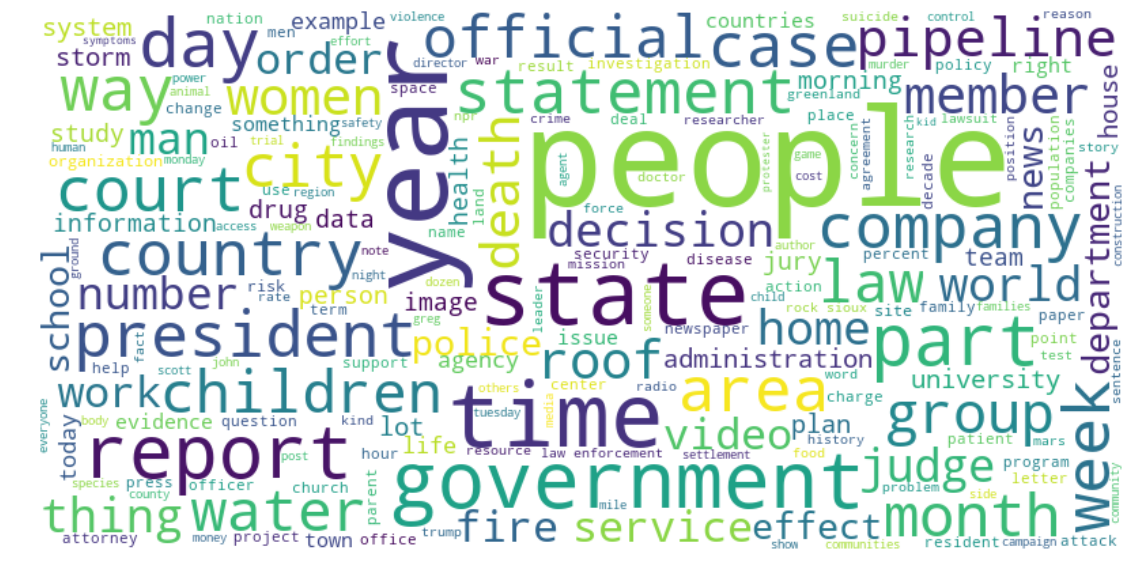

In [114]:
NN_rh_text =(" ").join(NN_list_rh)
type(NN_rh_text)
# top 200 active listing noun word cloud
# lower max_font_size, change the maximum number of word and lighten the background:
wc_rh = WordCloud(width=800, height=400, stopwords=nltk_stopwords, max_font_size=100, max_words=200, background_color="white").\
generate(NN_rh_text)
#stopwords:set of strings or None
#The words that will be eliminated. If None, the build-in STOPWORDS list will be used. Ignored if using generate_from_frequencies.

plt.figure( figsize=(20,10) )
plt.imshow(wc_rh, interpolation="bilinear")
plt.axis("off")
plt.show()


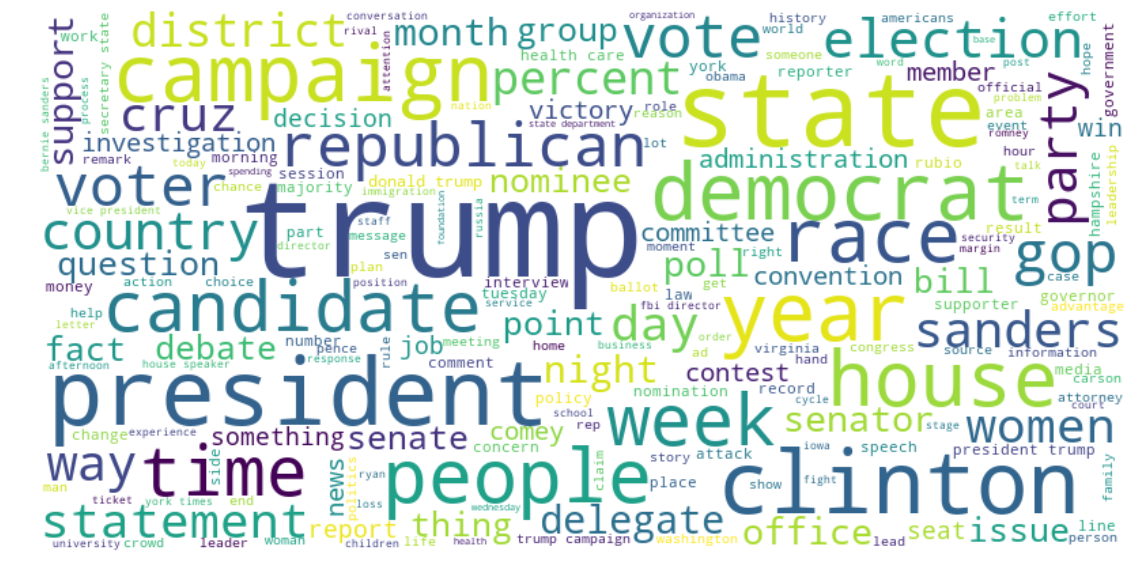

In [115]:
NN_jt_text =(" ").join(NN_list_jt)
type(NN_jt_text)
# top 200 active listing noun word cloud
# lower max_font_size, change the maximum number of word and lighten the background:
wc_jt = WordCloud(width=800, height=400, stopwords=nltk_stopwords, max_font_size=100, max_words=200, background_color="white").\
generate(NN_jt_text)
#stopwords:set of strings or None
#The words that will be eliminated. If None, the build-in STOPWORDS list will be used. Ignored if using generate_from_frequencies.

plt.figure( figsize=(20,10) )
plt.imshow(wc_jt, interpolation="bilinear")
plt.axis("off")
plt.show()


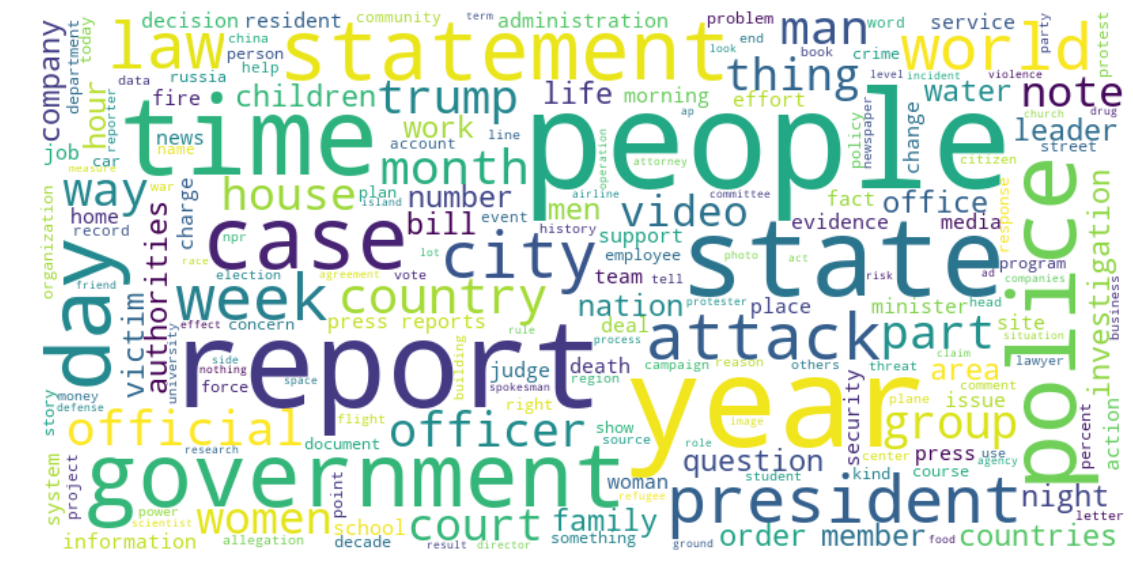

In [116]:
NN_cd2_text =(" ").join(NN_list_cd2)
type(NN_cd2_text)
# top 200 active listing noun word cloud
# lower max_font_size, change the maximum number of word and lighten the background:
wc_cd2 = WordCloud(width=800, height=400, stopwords=nltk_stopwords, max_font_size=100, max_words=200, background_color="white").\
generate(NN_cd2_text)
#stopwords:set of strings or None
#The words that will be eliminated. If None, the build-in STOPWORDS list will be used. Ignored if using generate_from_frequencies.

plt.figure( figsize=(20,10) )
plt.imshow(wc_cd2, interpolation="bilinear")
plt.axis("off")
plt.show()


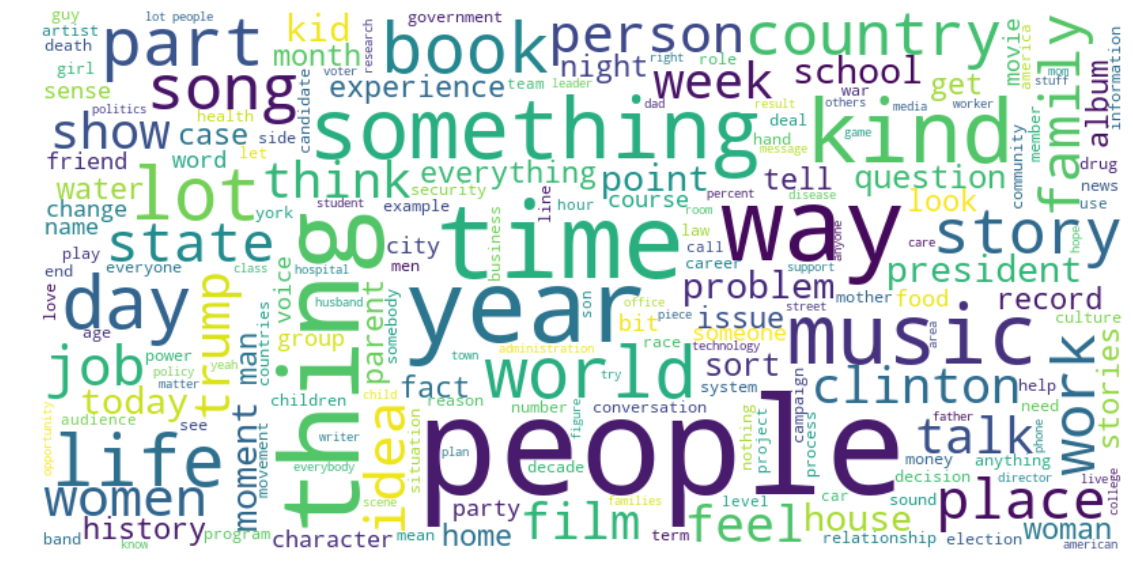

In [117]:
NN_sf_text =(" ").join(NN_list_sf)
type(NN_sf_text)
# top 200 active listing noun word cloud
# lower max_font_size, change the maximum number of word and lighten the background:
wc_sf = WordCloud(width=800, height=400, stopwords=nltk_stopwords, max_font_size=100, max_words=200, background_color="white").\
generate(NN_sf_text)
#stopwords:set of strings or None
#The words that will be eliminated. If None, the build-in STOPWORDS list will be used. Ignored if using generate_from_frequencies.

plt.figure( figsize=(20,10) )
plt.imshow(wc_sf, interpolation="bilinear")
plt.axis("off")
plt.show()


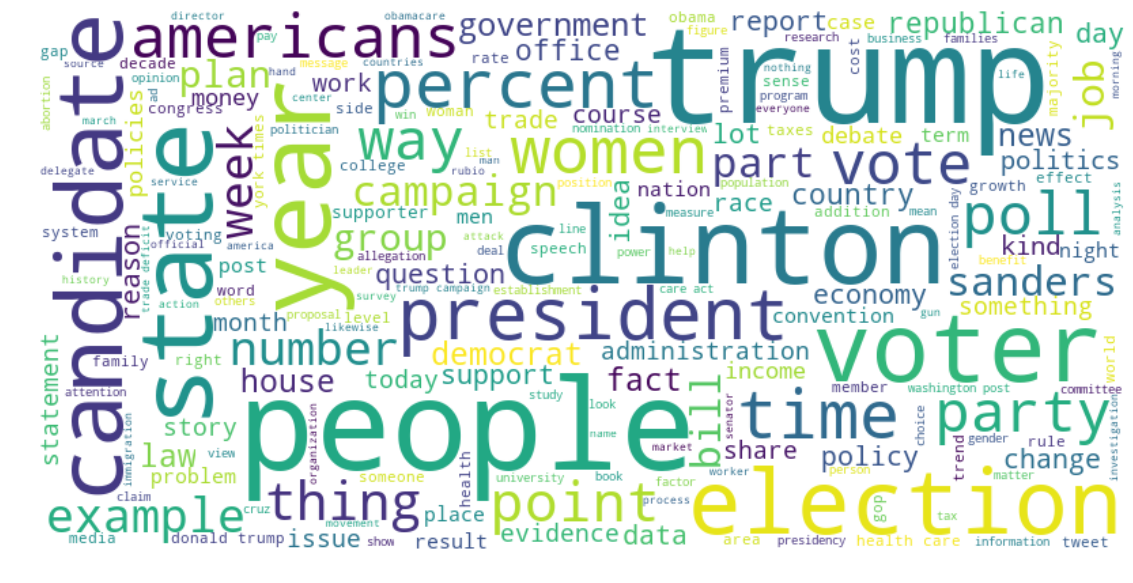

In [118]:
NN_dk_text =(" ").join(NN_list_dk)
type(NN_dk_text)
# top 200 active listing noun word cloud
# lower max_font_size, change the maximum number of word and lighten the background:
wc_dk = WordCloud(width=800, height=400, stopwords=nltk_stopwords, max_font_size=100, max_words=200, background_color="white").\
generate(NN_dk_text)
#stopwords:set of strings or None
#The words that will be eliminated. If None, the build-in STOPWORDS list will be used. Ignored if using generate_from_frequencies.

plt.figure( figsize=(20,10) )
plt.imshow(wc_dk, interpolation="bilinear")
plt.axis("off")
plt.show()


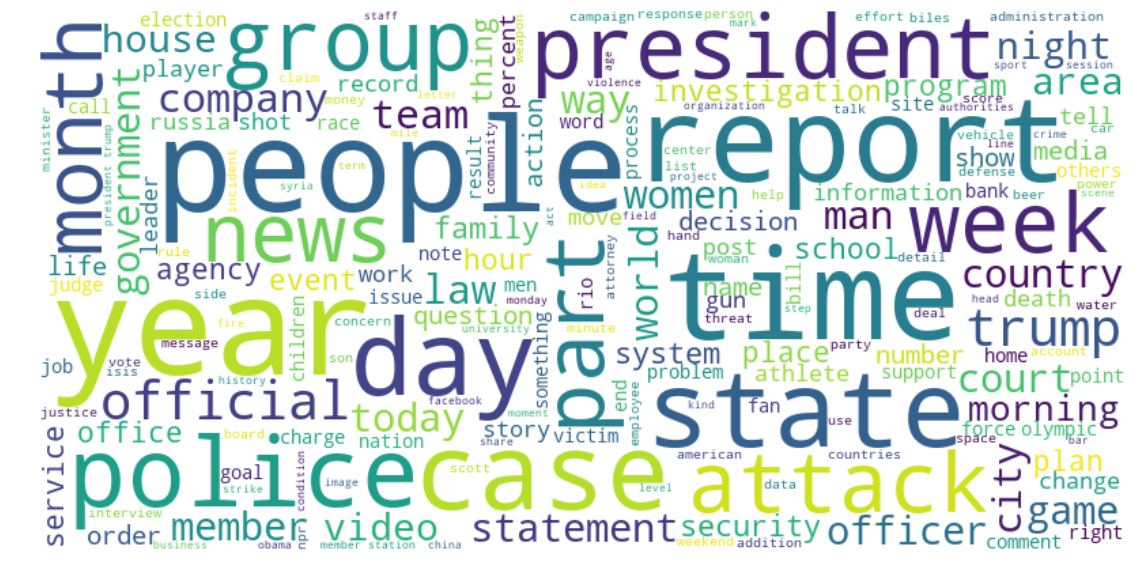

In [119]:
NN_bc_text =(" ").join(NN_list)
type(NN_bc_text)
# top 200 active listing noun word cloud
# lower max_font_size, change the maximum number of word and lighten the background:
wc_bc = WordCloud(width=800, height=400, stopwords=nltk_stopwords, max_font_size=100, max_words=200, background_color="white").\
generate(NN_bc_text)
#stopwords:set of strings or None
#The words that will be eliminated. If None, the build-in STOPWORDS list will be used. Ignored if using generate_from_frequencies.

plt.figure( figsize=(20,10) )
plt.imshow(wc_bc, interpolation="bilinear")
plt.axis("off")
plt.show()


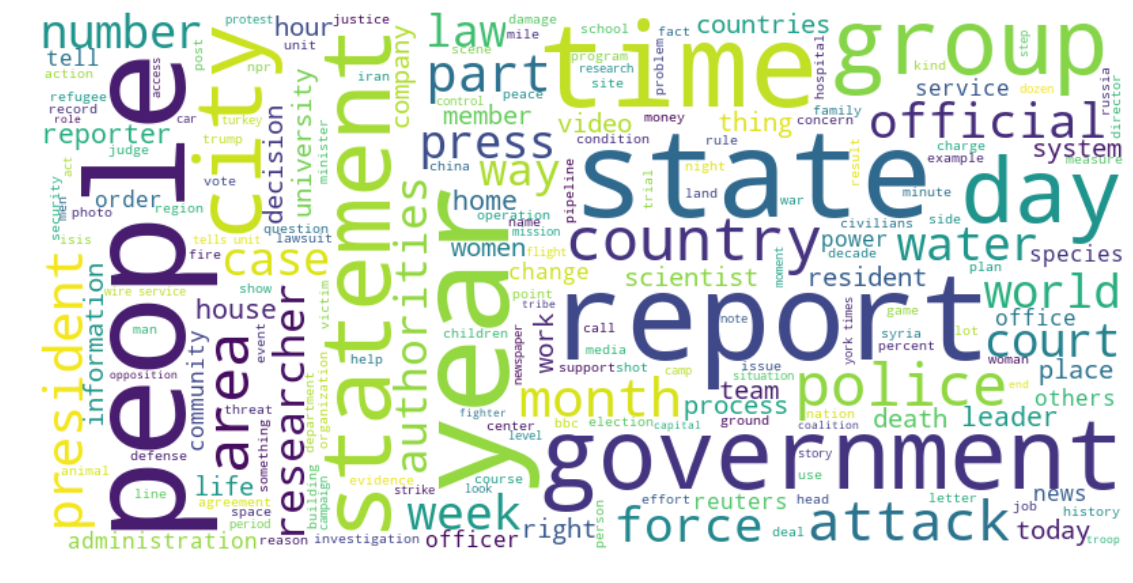

In [120]:
NN_mk_text =(" ").join(NN_list_mk)
type(NN_mk_text)
# top 200 active listing noun word cloud
# lower max_font_size, change the maximum number of word and lighten the background:
wc_mk = WordCloud(width=800, height=400, stopwords=nltk_stopwords, max_font_size=100, max_words=200, background_color="white").\
generate(NN_mk_text)
#stopwords:set of strings or None
#The words that will be eliminated. If None, the build-in STOPWORDS list will be used. Ignored if using generate_from_frequencies.

plt.figure( figsize=(20,10) )
plt.imshow(wc_mk, interpolation="bilinear")
plt.axis("off")
plt.show()
